# 1. Data Collection

In [5]:
now = datetime.now()

start = datetime(now.year-10, now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start=start, end=end, auto_adjust=False)
df

NameError: name 'datetime' is not defined

# 2. Data Exploration & Visulalisation

In [ ]:
df.shape

(2515, 6)

In [ ]:
df.isna().sum()

Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

In [ ]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,107.207734,109.420996,110.513498,108.212699,109.316657,1.057632e+08
std,69.905199,69.519395,70.198309,68.753921,69.444979,5.951013e+07
min,20.624052,22.584999,22.917500,22.367500,22.500000,2.068745e+07
25%,40.333477,42.763750,43.119999,42.408751,42.754999,6.511130e+07
50%,111.772568,114.907501,116.000000,112.680000,114.550003,9.191280e+07
75%,168.132614,170.029999,171.680000,168.610001,170.000000,1.297646e+08
max,258.103729,259.019989,260.100006,257.630005,258.190002,5.334788e+08


In [ ]:
df.dtypes

Price      Ticker
Adj Close  AAPL      float64
Close      AAPL      float64
High       AAPL      float64
Low        AAPL      float64
Open       AAPL      float64
Volume     AAPL        int64
dtype: object

In [ ]:
df = df.reset_index()
df

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-09-15,26.131084,29.070000,29.132500,28.605000,28.982500,173364800
1,2015-09-16,26.160299,29.102501,29.135000,28.860001,29.062500,148694000
2,2015-09-17,25.600737,28.480000,29.122499,28.430000,28.915001,256450400
3,2015-09-18,25.495111,28.362499,28.575001,27.967501,28.052500,297141200
4,2015-09-21,25.890636,28.802500,28.842501,28.415001,28.417500,200888000
...,...,...,...,...,...,...,...
2510,2025-09-09,234.350006,234.350006,238.779999,233.360001,237.000000,66313900
2511,2025-09-10,226.789993,226.789993,232.419998,225.949997,232.190002,83440800
2512,2025-09-11,230.029999,230.029999,230.449997,226.649994,226.880005,50208600


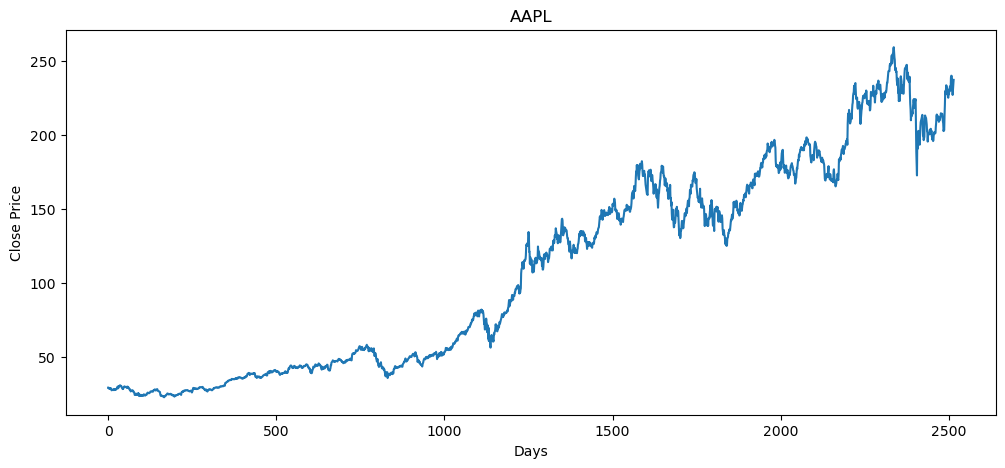

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days');
plt.ylabel('Close Price');

# 3. Feature Engineering

In [ ]:
temp_df = [10,20,30,40,50,60,70,80,90,100]
sum(temp_df[2:7])/5

50.0

In [ ]:
df1 = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [ ]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


## 100 Days Moving Average

In [ ]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head(103)

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-09-15,26.131084,29.070000,29.132500,28.605000,28.982500,173364800,NaN
1,2015-09-16,26.160299,29.102501,29.135000,28.860001,29.062500,148694000,NaN
2,2015-09-17,25.600737,28.480000,29.122499,28.430000,28.915001,256450400,NaN
3,2015-09-18,25.495111,28.362499,28.575001,27.967501,28.052500,297141200,NaN
4,2015-09-21,25.890636,28.802500,28.842501,28.415001,28.417500,200888000,NaN
...,...,...,...,...,...,...,...,...
98,2016-02-04,21.919714,24.150000,24.332500,23.797501,23.965000,185886800,NaN
99,2016-02-05,21.334276,23.504999,24.230000,23.422501,24.129999,185672400,27.569225
100,2016-02-08,21.558926,23.752501,23.924999,23.260000,23.282499,216085600,27.516050


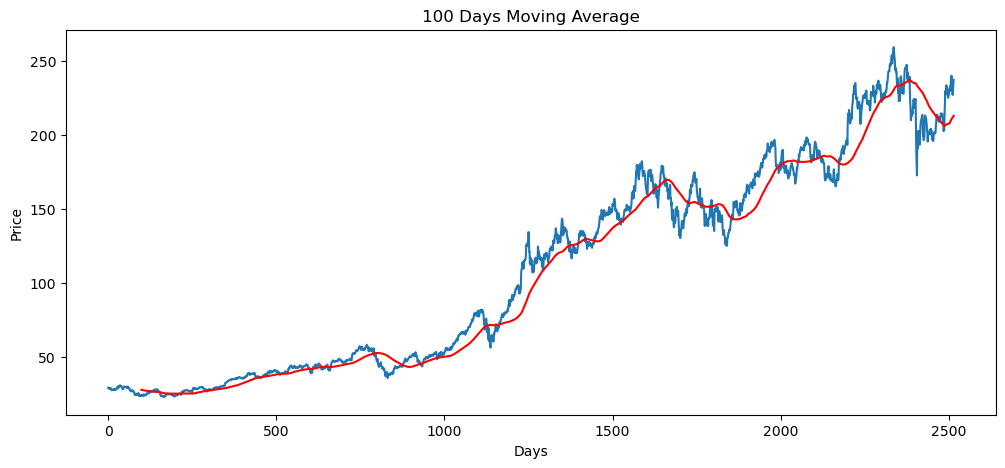

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.title('100 Days Moving Average')
plt.xlabel('Days');
plt.ylabel('Price');

## 200 Days Moving Average

In [ ]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-09-15,26.131084,29.070000,29.132500,28.605000,28.982500,173364800,NaN,NaN
1,2015-09-16,26.160299,29.102501,29.135000,28.860001,29.062500,148694000,NaN,NaN
2,2015-09-17,25.600737,28.480000,29.122499,28.430000,28.915001,256450400,NaN,NaN
3,2015-09-18,25.495111,28.362499,28.575001,27.967501,28.052500,297141200,NaN,NaN
4,2015-09-21,25.890636,28.802500,28.842501,28.415001,28.417500,200888000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
198,2016-06-28,21.366005,23.397499,23.415001,23.035000,23.225000,161779600,24.991575,NaN
199,2016-06-29,21.550926,23.600000,23.637501,23.407499,23.492500,146124000,24.992525,26.280875
200,2016-06-30,21.824884,23.900000,23.942499,23.575001,23.610001,143345600,24.994000,26.255025


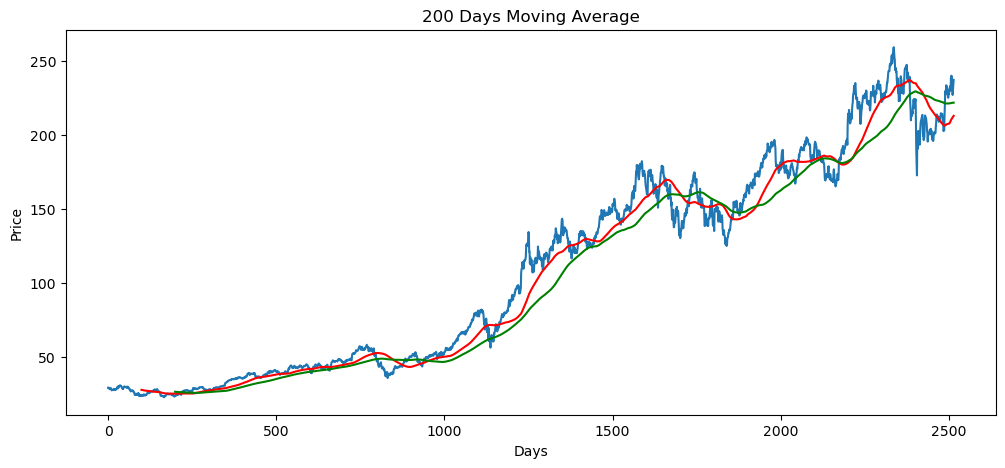

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')
plt.title('200 Days Moving Average')
plt.xlabel('Days');
plt.ylabel('Price');

In [ ]:
df

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-09-15,26.131084,29.070000,29.132500,28.605000,28.982500,173364800,NaN,NaN
1,2015-09-16,26.160299,29.102501,29.135000,28.860001,29.062500,148694000,NaN,NaN
2,2015-09-17,25.600737,28.480000,29.122499,28.430000,28.915001,256450400,NaN,NaN
3,2015-09-18,25.495111,28.362499,28.575001,27.967501,28.052500,297141200,NaN,NaN
4,2015-09-21,25.890636,28.802500,28.842501,28.415001,28.417500,200888000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2510,2025-09-09,234.350006,234.350006,238.779999,233.360001,237.000000,66313900,211.2194,221.49225
2511,2025-09-10,226.789993,226.789993,232.419998,225.949997,232.190002,83440800,211.5446,221.48480
2512,2025-09-11,230.029999,230.029999,230.449997,226.649994,226.880005,50208600,211.8751,221.48995


## Calculating % Changed in each trading session

In [ ]:
df['Percentage Chaged'] = df.Close.pct_change()
df[['Close', 'Percentage Chaged']]

Price,Close,Percentage Chaged
Ticker,AAPL,
0,29.070000,NaN
1,29.102501,0.001118
2,28.480000,-0.021390
3,28.362499,-0.004126
4,28.802500,0.015513
...,...,...
2510,234.350006,-0.014839
2511,226.789993,-0.032259
2512,230.029999,0.014286


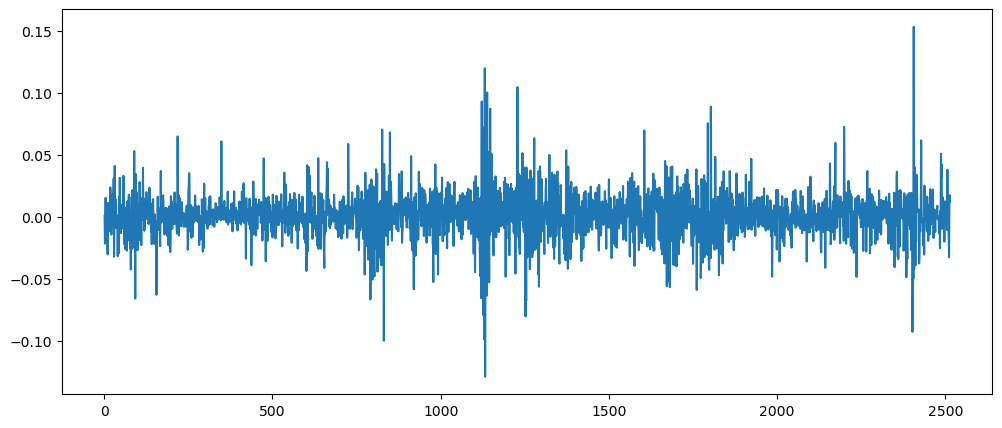

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df['Percentage Chaged']);

# 4. Data Preprocessing

In [ ]:
df.shape

(2515, 10)

In [ ]:
# Splitting Data into Training and Testing Datasets

data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])

In [ ]:
type(data_training)

pandas.core.frame.DataFrame

In [ ]:
type(data_testing)

pandas.core.frame.DataFrame

In [ ]:
data_training

Ticker,AAPL
0,29.070000
1,29.102501
2,28.480000
3,28.362499
4,28.802500
...,...
1755,155.809998
1756,154.529999
1757,155.960007
1758,154.460007


In [ ]:
data_testing

Ticker,AAPL
1760,163.429993
1761,153.839996
1762,155.309998
1763,152.369995
1764,150.699997
...,...
2510,234.350006
2511,226.789993
2512,230.029999
2513,234.070007


## Scaling down the data between 0 and 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.04067744],
       [0.0408813 ],
       [0.03697664],
       ...,
       [0.83660035],
       [0.82719154],
       [0.84544457]], shape=(1760, 1))

In [ ]:
type(data_training_array)

numpy.ndarray

In [ ]:
data_training_array.shape

(1760, 1)

# 5. Sequence Creation

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])


x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train

array([[[0.04067744],
        [0.0408813 ],
        [0.03697664],
        ...,
        [0.0094245 ],
        [0.00981653],
        [0.00577074]],

       [[0.0408813 ],
        [0.03697664],
        [0.03623961],
        ...,
        [0.00981653],
        [0.00577074],
        [0.0073232 ]],

       [[0.03697664],
        [0.03623961],
        [0.03899953],
        ...,
        [0.00577074],
        [0.0073232 ],
        [0.00729183]],

       ...,

       [[0.92717578],
        [0.89512309],
        [0.89374322],
        ...,
        [0.84914544],
        [0.83565942],
        [0.82763057]],

       [[0.89512309],
        [0.89374322],
        [0.90835816],
        ...,
        [0.83565942],
        [0.82763057],
        [0.83660035]],

       [[0.89374322],
        [0.90835816],
        [0.90729184],
        ...,
        [0.82763057],
        [0.83660035],
        [0.82719154]]], shape=(1660, 100, 1))

In [ ]:
y_train

array([0.0073232 , 0.00729183, 0.00616277, ..., 0.83660035, 0.82719154,
       0.84544457], shape=(1660,))

In [ ]:
x_train.shape

(1660, 100, 1)

In [ ]:
y_train.shape

(1660,)

In [ ]:
x_train.ndim

3

# 6. Model Building

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [2]:
# ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [3]:
model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7. Model Training

In [4]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

NameError: name 'x_train' is not defined

In [ ]:
model.summary()

In [ ]:
# Save the trained model
model.save('stock_prediction_model.keras')

# 8. Preparing Test Data

In [ ]:
data_training.tail(100)

In [ ]:
data_testing

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
past_100_days

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

In [ ]:
input_data = scaler.fit_transform(final_df)
# input_data

In [ ]:
input_data.shape

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
x_test[0].shape

In [ ]:
x_test

# 9. Making Predictions

In [ ]:
y_predicted = model.predict(x_test)

In [ ]:
y_predicted

In [ ]:
y_test

In [ ]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [ ]:
y_predicted

In [ ]:
y_test

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450, 750)
plt.ylim(140, 220)

# 10. Model Evaluation

In [ ]:
# Mean Squared Error (MSE)

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

In [ ]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

In [ ]:
# R-Squared
r2 = r2_score(y_test, y_predicted)
print(f"R-Squared: {r2}")